In [2]:
import pandas as pd

data = pd.read_csv('tumor.csv')
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Exploration and Cleaning

In [6]:
#Check for Missing Values
missing_values = data.isnull().sum()
print(missing_values)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [8]:
# Summary statistics
summary_statistics = data.describe()
print(summary_statistics)

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

In [11]:
# Check data types
data_type = data.dtypes
print(data_type)

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


In [12]:
# check duplicates
duplicates = data.duplicated().sum()
print(duplicates)

8


In [13]:
# Find duplicated rows (considering all duplicates, including the first occurrence)
duplicated_rows = data[data.duplicated(keep=False)]

# Display duplicated rows
print(duplicated_rows)


     Sample code number  Clump Thickness  Uniformity of Cell Size  \
40              1100524                6                       10   
60              1116116                9                       10   
162             1198641                3                        1   
201             1218860                1                        1   
202             1218860                1                        1   
245             1100524                6                       10   
246             1116116                9                       10   
250             1198641                3                        1   
259              320675                3                        3   
264              320675                3                        3   
302              704097                1                        1   
324              704097                1                        1   
545             1321942                5                        1   
546             1321942           

In [35]:
#Remove duplicates and keep the first occurance 
data= data.drop_duplicates()

# Check the shape of the data to verify rows are removed
print(data.shape)
data.describe()

(449, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,3.051225
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.999801
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Exploratory Data Analysis EDA


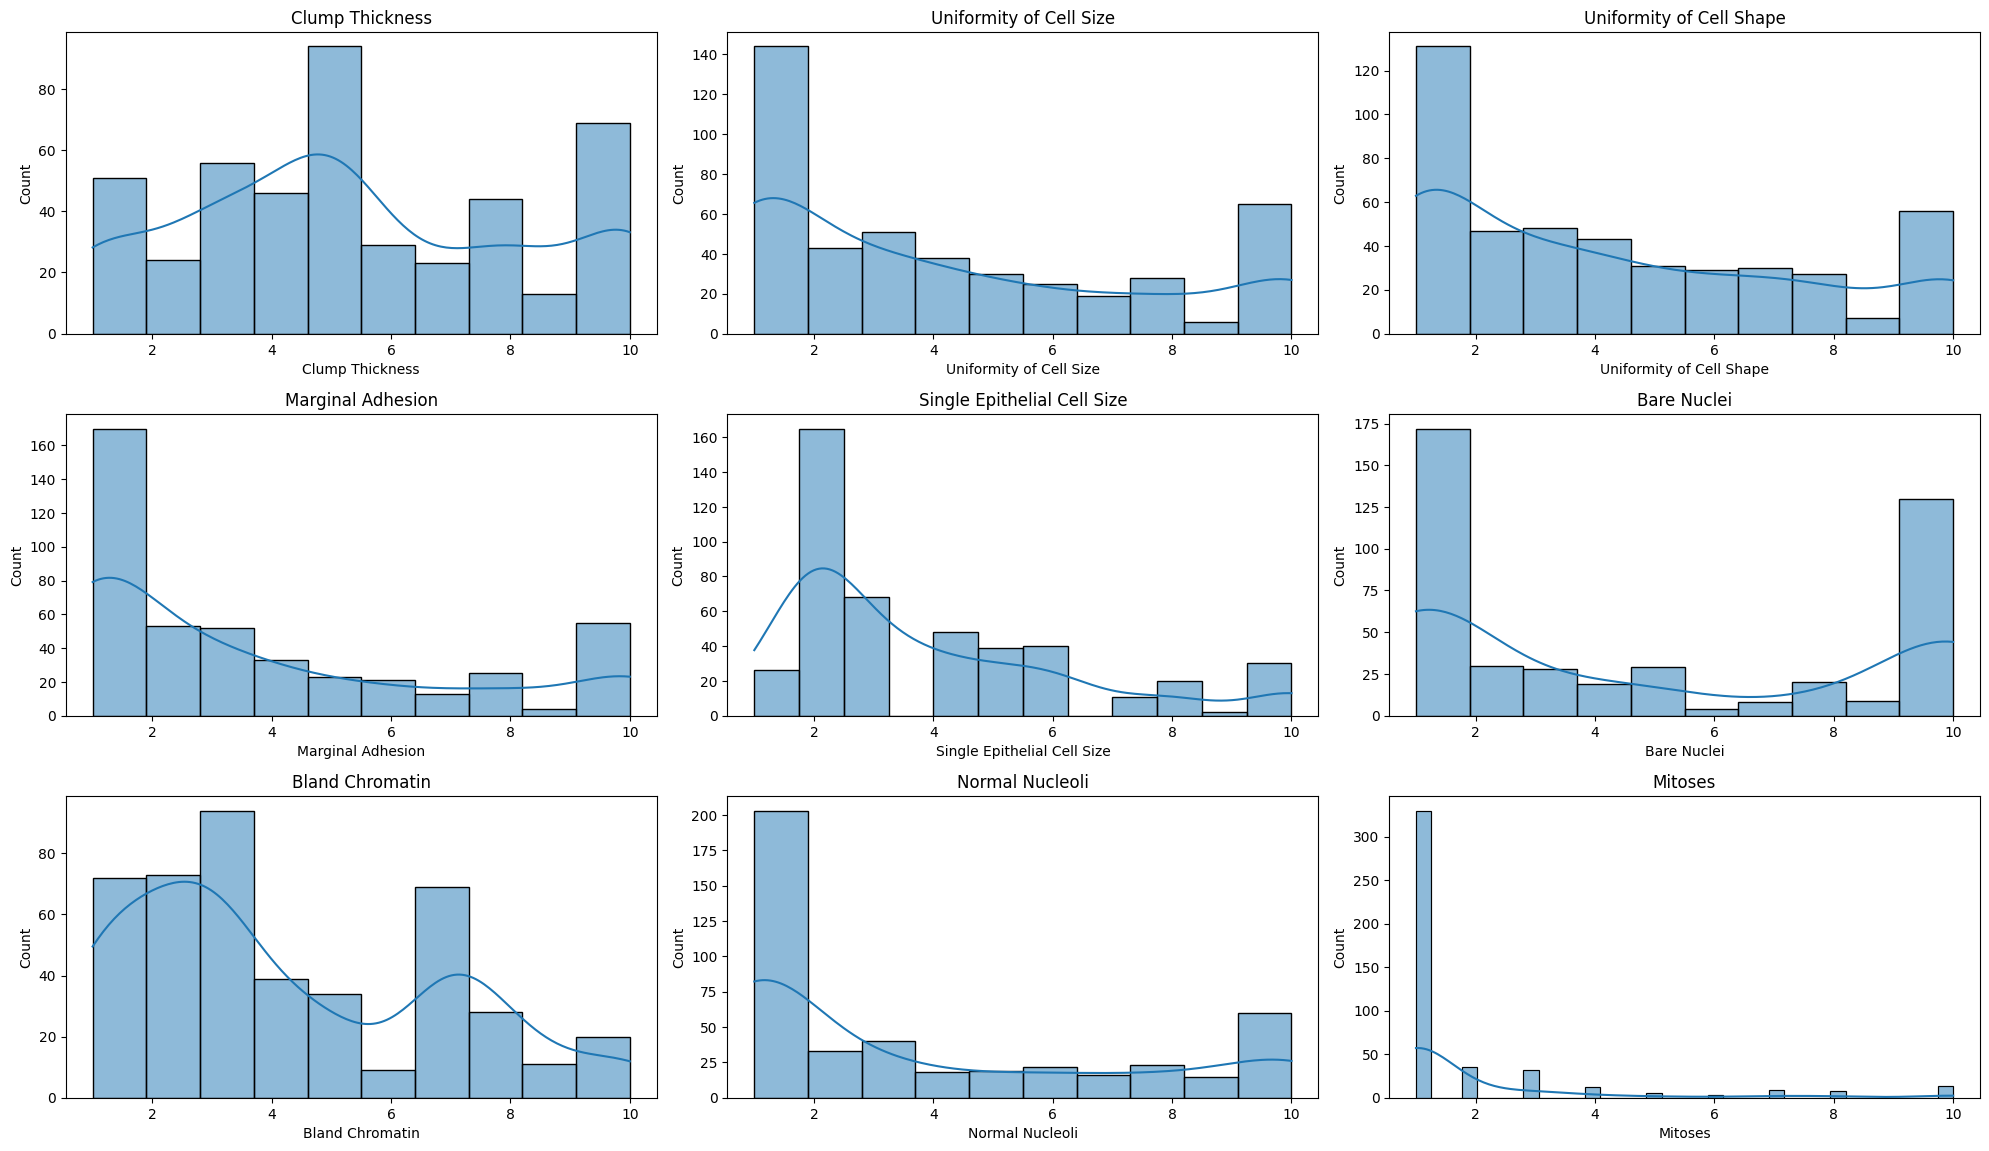

In [33]:
#Visualize the ditribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns 

# Setting up the figure for distribution plots
plt.figure(figsize=(20,15))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


In [1]:
# Checking the balance of the target classes
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Class'])
plt.title('Class Distribution (Benign vs Malignant)')
plt.xticks([0, 1], ['Benign', 'Malignant'])

# Calculate percentages and annotate the countplot
total = len(data['Class'])  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calculate percentage
    x = p.get_x() + p.get_width() / 2 - 0.05  # Set the x position of the text
    y = p.get_y() + p.get_height()           # Set the y position of the text
    ax.annotate(percentage, (x, y), ha='center')  # Place the text on the plot

plt.show()


NameError: name 'plt' is not defined

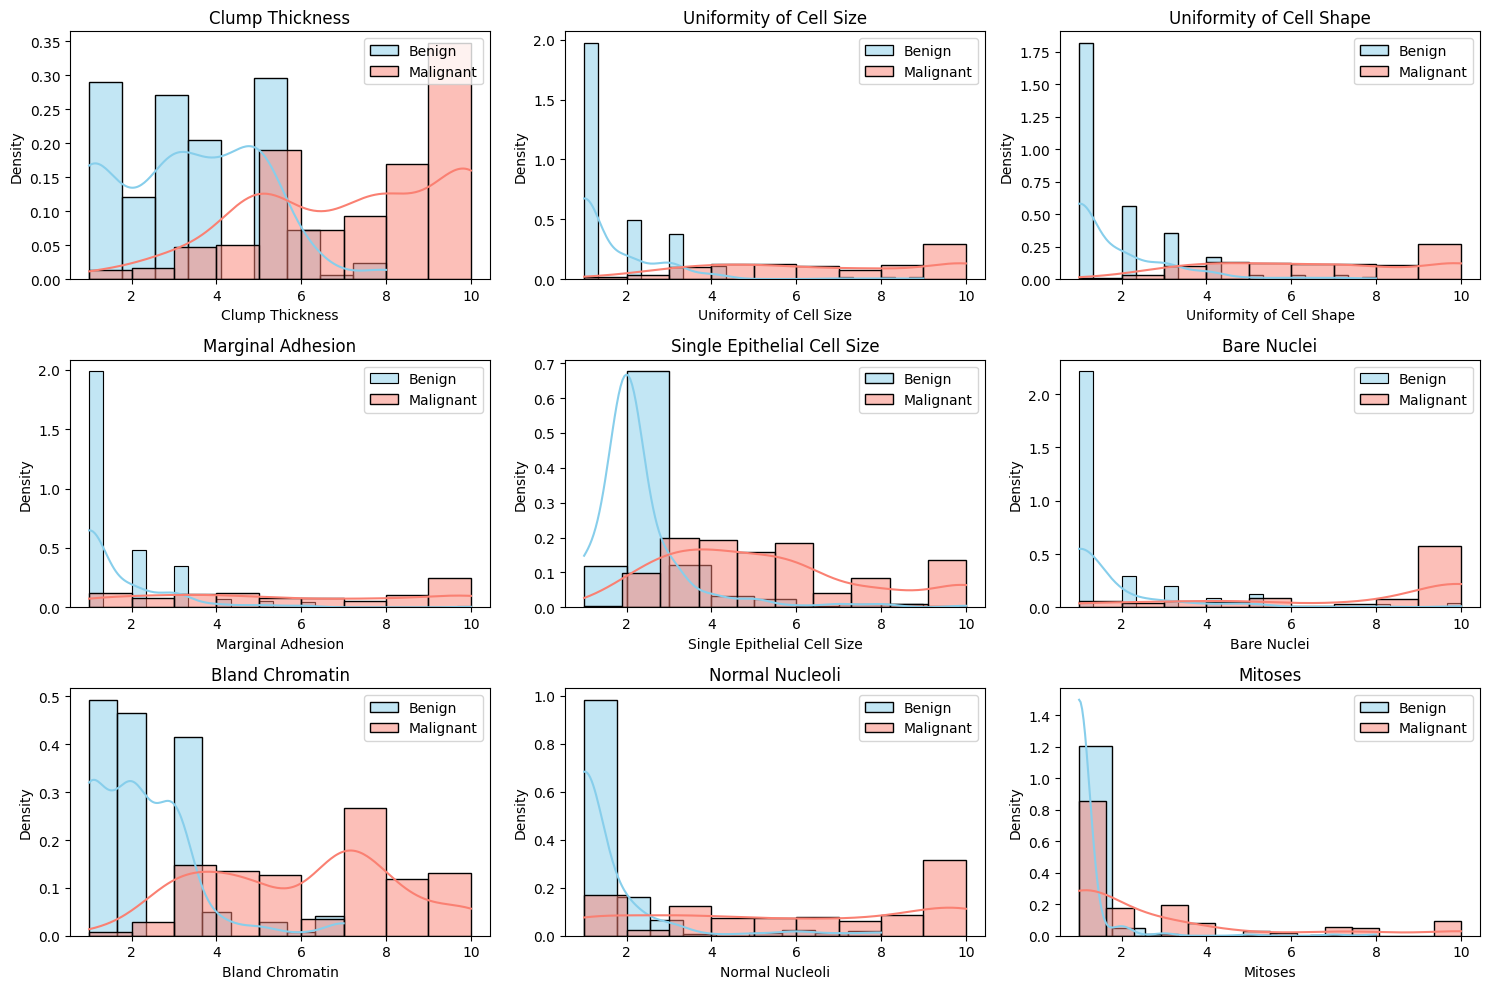

In [37]:
# Assuming 'data' is your DataFrame and the last column 'Class' contains the class labels.

import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot, assuming the 'Class' column is the last column
features = data.columns[:-1]

# Setting up the plotting area, 3 rows of subplots, and 3 columns
plt.figure(figsize=(15, 10))

# Loop through each feature to create a subplot for each
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)  # Create a new subplot for each feature
    # Plot the distribution for benign tumors
    sns.histplot(data[data['Class'] == 2][feature], color='skyblue', label='Benign', kde=True, stat="density", common_norm=False)
    # Plot the distribution for malignant tumors
    sns.histplot(data[data['Class'] == 4][feature], color='salmon', label='Malignant', kde=True, stat="density", common_norm=False)
    plt.title(feature)  # Set the title of the subplot to the feature name
    plt.legend()  # Add a legend to differentiate benign vs malignant

plt.tight_layout()  # Adjust the layout so plots don't overlap
plt.show()  # Display the plots
